## Installation

In [ ]:
pip install tensorflow tensorflow-datasets

## Import Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar()

## Find Datasets

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

## Get Information on the Data

In [ ]:
builder = tfds.builder('rock_paper_scissors')

In [ ]:
info = builder.info
info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## Prepare Rock,Paper,Scissors Data

In [ ]:
ds_train = tfds.load(name='rock_paper_scissors',split='train')
ds_test  = tfds.load(name="rock_paper_scissors",split='test')

## Show Examples

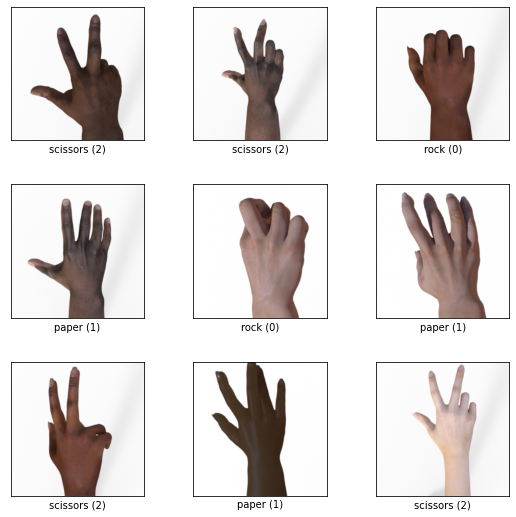

In [ ]:
fig = tfds.show_examples(info,ds_train)

## Additional Data Prep

In [ ]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])


In [ ]:
train_images = train_images.reshape(2520,300,300,1)
test_images = test_images.reshape(372,300,300,1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255


In [ ]:
train_images[0].shape

(300, 300, 1)

## Train a Network(basic approach)


In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation='relu'),
                          keras.layers.Dense(256,activation='relu'),
                          keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=32)

Epoch 1/10
79/79 [==============================] - 1s 10ms/step - loss: 25.5296 - accuracy: 0.4004
Epoch 2/10
79/79 [==============================] - 1s 10ms/step - loss: 1.8919 - accuracy: 0.6798
Epoch 3/10
79/79 [==============================] - 1s 10ms/step - loss: 1.8898 - accuracy: 0.6524
Epoch 4/10
79/79 [==============================] - 1s 10ms/step - loss: 0.9786 - accuracy: 0.7377
Epoch 5/10
79/79 [==============================] - 1s 10ms/step - loss: 0.6022 - accuracy: 0.8230
Epoch 6/10
79/79 [==============================] - 1s 10ms/step - loss: 0.4712 - accuracy: 0.8488
Epoch 7/10
79/79 [==============================] - 1s 10ms/step - loss: 0.3446 - accuracy: 0.8762
Epoch 8/10
79/79 [==============================] - 1s 10ms/step - loss: 0.1842 - accuracy: 0.9325
Epoch 9/10
79/79 [==============================] - 1s 10ms/step - loss: 0.1235 - accuracy: 0.9607
Epoch 10/10
79/79 [==============================] - 1s 10ms/step - loss: 0.1081 - accuracy: 0.9655


In [ ]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 6ms/step - loss: 2.4194 - accuracy: 0.4704


[2.419400691986084, 0.4704301059246063]

## Train a Network(convolutional approach)




In [ ]:
model = keras.Sequential([
                          keras.layers.Conv2D(64,3,activation='relu',input_shape=(300,300,1)),
                          keras.layers.Conv2D(32,3,activation='relu'),
                          keras.layers.Flatten(),
                          keras.layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 8s 102ms/step - loss: 4.1274 - accuracy: 0.7437
Epoch 2/5
79/79 [==============================] - 8s 98ms/step - loss: 0.1627 - accuracy: 0.9750
Epoch 3/5
79/79 [==============================] - 8s 98ms/step - loss: 0.0410 - accuracy: 0.9972
Epoch 4/5
79/79 [==============================] - 8s 98ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 5/5
79/79 [==============================] - 8s 98ms/step - loss: 0.0026 - accuracy: 1.0000


In [ ]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 1s 50ms/step - loss: 2.3696 - accuracy: 0.5081


[2.3695783615112305, 0.5080645084381104]

## A Better Convolutional Network

In [ ]:
model = keras.Sequential([
                          keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)),
                          keras.layers.Conv2D(64,3,activation='relu'),
                          keras.layers.Conv2D(32,3,activation='relu'),
                          keras.layers.MaxPool2D(2,2),
                          keras.layers.Dropout(0.5),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128,activation='relu'),
                          keras.layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5,batch_size=32)

Epoch 1/5
79/79 [==============================] - 1s 17ms/step - loss: 0.7625 - accuracy: 0.7179
Epoch 2/5
79/79 [==============================] - 1s 17ms/step - loss: 0.0827 - accuracy: 0.9802
Epoch 3/5
79/79 [==============================] - 1s 16ms/step - loss: 0.0165 - accuracy: 0.9972
Epoch 4/5
79/79 [==============================] - 1s 16ms/step - loss: 0.0111 - accuracy: 0.9972
Epoch 5/5
79/79 [==============================] - 1s 16ms/step - loss: 0.0082 - accuracy: 0.9988


In [ ]:
model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 1.2995 - accuracy: 0.6586


[1.2995216846466064, 0.6586021780967712]

## Hyperparameter Tuning

In [ ]:
pip install -U keras-tuner


     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=23f53156f461d989f93ab8fbaa83e757ab491029227fabc246ea916355d816da
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=46c8e171b00b6af168747e1074a3e107ee4aeae3691874871abf1834784c7c1f
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [ ]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  
  model = keras.Sequential()
  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))
  for i in range(hp.Int('Conv Layers',min_value=0,max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters",[16,32,64]),3,activation='relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice('Dense layer',[64,128,256,512,1024]),activation='relu'))

  model.add(keras.layers.Dense(3,activation='softmax'))
  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
    directory='./new_directory'
)
tuner.search(train_images,train_labels,validation_data=(test_images,test_labels),epochs=10,batch_size=32)

Epoch 1/10
79/79 [==============================] - 2s 21ms/step - loss: 1.3530 - accuracy: 0.6500 - val_loss: 0.8334 - val_accuracy: 0.6371
Epoch 2/10
79/79 [==============================] - 1s 15ms/step - loss: 0.1857 - accuracy: 0.9619 - val_loss: 0.8104 - val_accuracy: 0.5995
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0517 - accuracy: 0.9897 - val_loss: 0.7122 - val_accuracy: 0.7661
Epoch 4/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0237 - accuracy: 0.9956 - val_loss: 0.8426 - val_accuracy: 0.7446
Epoch 5/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0103 - accuracy: 0.9996 - val_loss: 0.8447 - val_accuracy: 0.7527
Epoch 6/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0067 - accuracy: 0.9996 - val_loss: 0.8943 - val_accuracy: 0.7608
Epoch 7/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.9808 - val_accuracy: 0.7527
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 23ms/step - loss: 0.8409 - accuracy: 0.6790 - val_loss: 1.0221 - val_accuracy: 0.5430
Epoch 2/10
79/79 [==============================] - 2s 22ms/step - loss: 0.1663 - accuracy: 0.9587 - val_loss: 0.6023 - val_accuracy: 0.7715
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0593 - accuracy: 0.9849 - val_loss: 0.6652 - val_accuracy: 0.7823
Epoch 4/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0238 - accuracy: 0.9937 - val_loss: 0.6519 - val_accuracy: 0.7903
Epoch 5/10
79/79 [==============================] - 1s 17ms/step - loss: 0.0165 - accuracy: 0.9964 - val_loss: 0.7358 - val_accuracy: 0.7527
Epoch 6/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.8650 - val_accuracy: 0.7285
Epoch 7/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0068 - accuracy: 0.9988 - val_loss: 0.7282 - val_accuracy: 0.7957
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 3s 33ms/step - loss: 0.7106 - accuracy: 0.7147 - val_loss: 1.1054 - val_accuracy: 0.4946
Epoch 2/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0681 - accuracy: 0.9817 - val_loss: 1.2101 - val_accuracy: 0.7177
Epoch 3/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0214 - accuracy: 0.9933 - val_loss: 1.5586 - val_accuracy: 0.6613
Epoch 4/10
79/79 [==============================] - 2s 30ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 1.4234 - val_accuracy: 0.7285
Epoch 5/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 1.3170 - val_accuracy: 0.5565
Epoch 6/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 1.3461 - val_accuracy: 0.6640
Epoch 7/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0261 - accuracy: 0.9909 - val_loss: 1.0637 - val_accuracy: 0.6210
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 16s 205ms/step - loss: 0.9946 - accuracy: 0.8036 - val_loss: 0.9149 - val_accuracy: 0.6694
Epoch 2/10
79/79 [==============================] - 47s 591ms/step - loss: 0.0224 - accuracy: 0.9944 - val_loss: 1.1384 - val_accuracy: 0.6828
Epoch 3/10
79/79 [==============================] - 3s 37ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 1.4998 - val_accuracy: 0.6694
Epoch 4/10
79/79 [==============================] - 3s 37ms/step - loss: 5.0022e-04 - accuracy: 1.0000 - val_loss: 1.6163 - val_accuracy: 0.6720
Epoch 5/10
79/79 [==============================] - 3s 37ms/step - loss: 3.0384e-04 - accuracy: 1.0000 - val_loss: 1.7511 - val_accuracy: 0.6640
Epoch 6/10
79/79 [==============================] - 3s 37ms/step - loss: 2.4574e-04 - accuracy: 1.0000 - val_loss: 1.7711 - val_accuracy: 0.6613
Epoch 7/10
79/79 [==============================] - 3s 37ms/step - loss: 1.4150e-04 - accuracy: 1.0000 - val_loss: 1.8570 - val_accuracy: 

Epoch 1/10
79/79 [==============================] - 2s 27ms/step - loss: 0.6823 - accuracy: 0.7567 - val_loss: 0.8347 - val_accuracy: 0.6801
Epoch 2/10
79/79 [==============================] - 2s 28ms/step - loss: 0.0986 - accuracy: 0.9790 - val_loss: 0.8479 - val_accuracy: 0.7204
Epoch 3/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0173 - accuracy: 0.9972 - val_loss: 0.9555 - val_accuracy: 0.7151
Epoch 4/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0102 - accuracy: 0.9984 - val_loss: 1.1151 - val_accuracy: 0.6989
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 1.2748 - val_accuracy: 0.7070
Epoch 6/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 1.3385 - val_accuracy: 0.6962
Epoch 7/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.5015 - val_accuracy: 0.7043
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 18ms/step - loss: 1.6007 - accuracy: 0.4825 - val_loss: 1.0645 - val_accuracy: 0.4355
Epoch 2/10
79/79 [==============================] - 1s 18ms/step - loss: 0.7247 - accuracy: 0.7131 - val_loss: 0.9835 - val_accuracy: 0.5000
Epoch 3/10
79/79 [==============================] - 1s 17ms/step - loss: 0.5358 - accuracy: 0.8444 - val_loss: 0.8496 - val_accuracy: 0.5968
Epoch 4/10
79/79 [==============================] - 2s 21ms/step - loss: 0.3324 - accuracy: 0.9250 - val_loss: 0.7290 - val_accuracy: 0.7581
Epoch 5/10
79/79 [==============================] - 1s 15ms/step - loss: 0.1619 - accuracy: 0.9758 - val_loss: 0.7648 - val_accuracy: 0.6613
Epoch 6/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0897 - accuracy: 0.9897 - val_loss: 0.8148 - val_accuracy: 0.6532
Epoch 7/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0529 - accuracy: 0.9937 - val_loss: 0.8961 - val_accuracy: 0.5914
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 20ms/step - loss: 1.2846 - accuracy: 0.6710 - val_loss: 0.8531 - val_accuracy: 0.5780
Epoch 2/10
79/79 [==============================] - 2s 20ms/step - loss: 0.2065 - accuracy: 0.9667 - val_loss: 0.6898 - val_accuracy: 0.7527
Epoch 3/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0940 - accuracy: 0.9885 - val_loss: 0.6989 - val_accuracy: 0.7419
Epoch 4/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0525 - accuracy: 0.9929 - val_loss: 0.7527 - val_accuracy: 0.7285
Epoch 5/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0341 - accuracy: 0.9952 - val_loss: 0.7527 - val_accuracy: 0.7258
Epoch 6/10
79/79 [==============================] - 2s 19ms/step - loss: 0.0204 - accuracy: 0.9976 - val_loss: 0.7425 - val_accuracy: 0.7661
Epoch 7/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0154 - accuracy: 0.9984 - val_loss: 0.8692 - val_accuracy: 0.7177
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 3s 32ms/step - loss: 1.0280 - accuracy: 0.5603 - val_loss: 0.9435 - val_accuracy: 0.5296
Epoch 2/10
79/79 [==============================] - 3s 32ms/step - loss: 0.2100 - accuracy: 0.9433 - val_loss: 0.8216 - val_accuracy: 0.5726
Epoch 3/10
79/79 [==============================] - 3s 32ms/step - loss: 0.0557 - accuracy: 0.9865 - val_loss: 0.7487 - val_accuracy: 0.6532
Epoch 4/10
79/79 [==============================] - 2s 32ms/step - loss: 0.0233 - accuracy: 0.9948 - val_loss: 0.8607 - val_accuracy: 0.7043
Epoch 5/10
79/79 [==============================] - 3s 32ms/step - loss: 0.0089 - accuracy: 0.9984 - val_loss: 1.0355 - val_accuracy: 0.7177
Epoch 6/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0072 - accuracy: 0.9988 - val_loss: 1.2510 - val_accuracy: 0.6694
Epoch 7/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 1.3118 - val_accuracy: 0.6828
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 10ms/step - loss: 1.4085 - accuracy: 0.3952 - val_loss: 1.0636 - val_accuracy: 0.3118
Epoch 2/10
79/79 [==============================] - 1s 9ms/step - loss: 0.9591 - accuracy: 0.5365 - val_loss: 1.1179 - val_accuracy: 0.3602
Epoch 3/10
79/79 [==============================] - 1s 9ms/step - loss: 0.8488 - accuracy: 0.6095 - val_loss: 1.0146 - val_accuracy: 0.3763
Epoch 4/10
79/79 [==============================] - 1s 9ms/step - loss: 0.7813 - accuracy: 0.6484 - val_loss: 1.0473 - val_accuracy: 0.4758
Epoch 5/10
79/79 [==============================] - 1s 9ms/step - loss: 0.8180 - accuracy: 0.6488 - val_loss: 1.0160 - val_accuracy: 0.3737
Epoch 6/10
79/79 [==============================] - 1s 9ms/step - loss: 0.7271 - accuracy: 0.6889 - val_loss: 1.0561 - val_accuracy: 0.5376
Epoch 7/10
79/79 [==============================] - 1s 9ms/step - loss: 0.7623 - accuracy: 0.6671 - val_loss: 0.9765 - val_accuracy: 0.5054
Epoch 8/10
79/79 [=

Epoch 1/10
79/79 [==============================] - 1s 10ms/step - loss: 1.2286 - accuracy: 0.3484 - val_loss: 1.0908 - val_accuracy: 0.3333
Epoch 2/10
79/79 [==============================] - 1s 9ms/step - loss: 1.0969 - accuracy: 0.3500 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/10
79/79 [==============================] - 1s 9ms/step - loss: 1.0988 - accuracy: 0.3337 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/10
79/79 [==============================] - 1s 9ms/step - loss: 1.0891 - accuracy: 0.3754 - val_loss: 1.0828 - val_accuracy: 0.4409
Epoch 5/10
79/79 [==============================] - 1s 9ms/step - loss: 1.0723 - accuracy: 0.4091 - val_loss: 1.0760 - val_accuracy: 0.4543
Epoch 6/10
79/79 [==============================] - 1s 9ms/step - loss: 1.0372 - accuracy: 0.4687 - val_loss: 1.0939 - val_accuracy: 0.3387
Epoch 7/10
79/79 [==============================] - 1s 9ms/step - loss: 1.0155 - accuracy: 0.4794 - val_loss: 1.0416 - val_accuracy: 0.4543
Epoch 8/10
79/79 [=

Epoch 1/10
79/79 [==============================] - 3s 35ms/step - loss: 1.4671 - accuracy: 0.6782 - val_loss: 0.8678 - val_accuracy: 0.4892
Epoch 2/10
79/79 [==============================] - 3s 34ms/step - loss: 0.2367 - accuracy: 0.9587 - val_loss: 0.7316 - val_accuracy: 0.6882
Epoch 3/10
79/79 [==============================] - 3s 34ms/step - loss: 0.1010 - accuracy: 0.9857 - val_loss: 0.6753 - val_accuracy: 0.7419
Epoch 4/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0477 - accuracy: 0.9948 - val_loss: 0.7656 - val_accuracy: 0.7151
Epoch 5/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0274 - accuracy: 0.9976 - val_loss: 0.7221 - val_accuracy: 0.7285
Epoch 6/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0183 - accuracy: 0.9984 - val_loss: 0.8334 - val_accuracy: 0.7151
Epoch 7/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0129 - accuracy: 0.9992 - val_loss: 0.8038 - val_accuracy: 0.7070
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 3s 35ms/step - loss: 1.5900 - accuracy: 0.6690 - val_loss: 0.8599 - val_accuracy: 0.6505
Epoch 2/10
79/79 [==============================] - 1s 19ms/step - loss: 0.1102 - accuracy: 0.9782 - val_loss: 1.1731 - val_accuracy: 0.6425
Epoch 3/10
79/79 [==============================] - 4s 51ms/step - loss: 0.0123 - accuracy: 0.9992 - val_loss: 1.6514 - val_accuracy: 0.6586
Epoch 4/10
79/79 [==============================] - 11s 135ms/step - loss: 0.0044 - accuracy: 0.9996 - val_loss: 1.6789 - val_accuracy: 0.6774
Epoch 5/10
79/79 [==============================] - 2s 19ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 1.7967 - val_accuracy: 0.6667
Epoch 6/10
79/79 [==============================] - 2s 19ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 2.2384 - val_accuracy: 0.6102
Epoch 7/10
79/79 [==============================] - 1s 19ms/step - loss: 3.6969e-04 - accuracy: 1.0000 - val_loss: 2.2547 - val_accuracy: 0.6452
Epoch 8

Epoch 1/10
79/79 [==============================] - 4s 49ms/step - loss: 0.8098 - accuracy: 0.6429 - val_loss: 0.9376 - val_accuracy: 0.6048
Epoch 2/10
79/79 [==============================] - 8s 104ms/step - loss: 0.0628 - accuracy: 0.9837 - val_loss: 1.1265 - val_accuracy: 0.6828
Epoch 3/10
79/79 [==============================] - 13s 165ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 1.3694 - val_accuracy: 0.6962
Epoch 4/10
79/79 [==============================] - 8s 101ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.5343 - val_accuracy: 0.7151
Epoch 5/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.6338 - val_accuracy: 0.7070
Epoch 6/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.5340 - val_accuracy: 0.6909
Epoch 7/10
79/79 [==============================] - 3s 32ms/step - loss: 3.5641e-04 - accuracy: 1.0000 - val_loss: 1.9588 - val_accuracy: 0.6962
Epoch

Epoch 1/10
79/79 [==============================] - 1s 17ms/step - loss: 0.8963 - accuracy: 0.6544 - val_loss: 0.9885 - val_accuracy: 0.5995
Epoch 2/10
79/79 [==============================] - 1s 17ms/step - loss: 0.1289 - accuracy: 0.9758 - val_loss: 0.7859 - val_accuracy: 0.6882
Epoch 3/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0238 - accuracy: 0.9968 - val_loss: 0.8955 - val_accuracy: 0.6828
Epoch 4/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0099 - accuracy: 0.9996 - val_loss: 0.9124 - val_accuracy: 0.6855
Epoch 5/10
79/79 [==============================] - 1s 14ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.0373 - val_accuracy: 0.6828
Epoch 6/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.1357 - val_accuracy: 0.6801
Epoch 7/10
79/79 [==============================] - 1s 15ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1590 - val_accuracy: 0.6882
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 15ms/step - loss: 1.5375 - accuracy: 0.5000 - val_loss: 0.9997 - val_accuracy: 0.6317
Epoch 2/10
79/79 [==============================] - 1s 13ms/step - loss: 0.7093 - accuracy: 0.7234 - val_loss: 1.0493 - val_accuracy: 0.3468
Epoch 3/10
79/79 [==============================] - 1s 12ms/step - loss: 0.4905 - accuracy: 0.8448 - val_loss: 0.9175 - val_accuracy: 0.5565
Epoch 4/10
79/79 [==============================] - 1s 13ms/step - loss: 0.3159 - accuracy: 0.9155 - val_loss: 0.8371 - val_accuracy: 0.6263
Epoch 5/10
79/79 [==============================] - 1s 15ms/step - loss: 0.2053 - accuracy: 0.9540 - val_loss: 0.8612 - val_accuracy: 0.6747
Epoch 6/10
79/79 [==============================] - 1s 13ms/step - loss: 0.1238 - accuracy: 0.9798 - val_loss: 0.8988 - val_accuracy: 0.6398
Epoch 7/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0911 - accuracy: 0.9853 - val_loss: 0.8811 - val_accuracy: 0.6774
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 23ms/step - loss: 1.4326 - accuracy: 0.6635 - val_loss: 0.8838 - val_accuracy: 0.6478
Epoch 2/10
79/79 [==============================] - 2s 23ms/step - loss: 0.2683 - accuracy: 0.9512 - val_loss: 0.6617 - val_accuracy: 0.7769
Epoch 3/10
79/79 [==============================] - 1s 17ms/step - loss: 0.1141 - accuracy: 0.9861 - val_loss: 0.6290 - val_accuracy: 0.7366
Epoch 4/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0618 - accuracy: 0.9925 - val_loss: 0.6228 - val_accuracy: 0.7742
Epoch 5/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0358 - accuracy: 0.9952 - val_loss: 0.6747 - val_accuracy: 0.7581
Epoch 6/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0245 - accuracy: 0.9976 - val_loss: 0.6784 - val_accuracy: 0.7473
Epoch 7/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0164 - accuracy: 0.9992 - val_loss: 0.6952 - val_accuracy: 0.7285
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 18ms/step - loss: 2.7548 - accuracy: 0.4714 - val_loss: 0.9903 - val_accuracy: 0.4919
Epoch 2/10
79/79 [==============================] - 2s 19ms/step - loss: 0.6807 - accuracy: 0.8024 - val_loss: 0.8681 - val_accuracy: 0.5645
Epoch 3/10
79/79 [==============================] - 2s 27ms/step - loss: 0.4608 - accuracy: 0.8889 - val_loss: 0.7708 - val_accuracy: 0.6129
Epoch 4/10
79/79 [==============================] - 1s 18ms/step - loss: 0.2868 - accuracy: 0.9381 - val_loss: 0.7424 - val_accuracy: 0.6344
Epoch 5/10
79/79 [==============================] - 1s 19ms/step - loss: 0.1619 - accuracy: 0.9710 - val_loss: 0.6453 - val_accuracy: 0.7661
Epoch 6/10
79/79 [==============================] - 1s 13ms/step - loss: 0.1101 - accuracy: 0.9825 - val_loss: 0.8339 - val_accuracy: 0.6398
Epoch 7/10
79/79 [==============================] - 1s 13ms/step - loss: 0.0739 - accuracy: 0.9889 - val_loss: 0.9031 - val_accuracy: 0.6317
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 23ms/step - loss: 0.7198 - accuracy: 0.6821 - val_loss: 0.7812 - val_accuracy: 0.6505
Epoch 2/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0749 - accuracy: 0.9802 - val_loss: 0.8801 - val_accuracy: 0.7177
Epoch 3/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.9027 - val_accuracy: 0.6989
Epoch 4/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0060 - accuracy: 0.9992 - val_loss: 1.0085 - val_accuracy: 0.6586
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0062 - accuracy: 0.9988 - val_loss: 1.0512 - val_accuracy: 0.6237
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0116 - accuracy: 0.9980 - val_loss: 1.2132 - val_accuracy: 0.6237
Epoch 7/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0683 - accuracy: 0.9778 - val_loss: 1.7873 - val_accuracy: 0.5403
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 27ms/step - loss: 1.2046 - accuracy: 0.7321 - val_loss: 0.8948 - val_accuracy: 0.5215
Epoch 2/10
79/79 [==============================] - 2s 27ms/step - loss: 0.0547 - accuracy: 0.9881 - val_loss: 0.6562 - val_accuracy: 0.7392
Epoch 3/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0113 - accuracy: 0.9976 - val_loss: 0.9838 - val_accuracy: 0.7043
Epoch 4/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 1.0242 - val_accuracy: 0.6989
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 7.8076e-04 - accuracy: 1.0000 - val_loss: 1.0894 - val_accuracy: 0.6774
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 4.5179e-04 - accuracy: 1.0000 - val_loss: 1.1012 - val_accuracy: 0.6694
Epoch 7/10
79/79 [==============================] - 2s 20ms/step - loss: 2.9679e-04 - accuracy: 1.0000 - val_loss: 1.2379 - val_accuracy: 0.6640
E

Epoch 1/10
79/79 [==============================] - 2s 26ms/step - loss: 0.8838 - accuracy: 0.6060 - val_loss: 1.1310 - val_accuracy: 0.4866
Epoch 2/10
79/79 [==============================] - 2s 25ms/step - loss: 0.2063 - accuracy: 0.9401 - val_loss: 1.1034 - val_accuracy: 0.6156
Epoch 3/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0889 - accuracy: 0.9746 - val_loss: 1.2864 - val_accuracy: 0.6075
Epoch 4/10
79/79 [==============================] - 2s 23ms/step - loss: 0.0633 - accuracy: 0.9802 - val_loss: 2.0344 - val_accuracy: 0.6048
Epoch 5/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0681 - accuracy: 0.9758 - val_loss: 2.4365 - val_accuracy: 0.6129
Epoch 6/10
79/79 [==============================] - 2s 25ms/step - loss: 0.0495 - accuracy: 0.9837 - val_loss: 1.7632 - val_accuracy: 0.6478
Epoch 7/10
79/79 [==============================] - 2s 25ms/step - loss: 0.0246 - accuracy: 0.9913 - val_loss: 1.9037 - val_accuracy: 0.6613
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 12ms/step - loss: 1.5109 - accuracy: 0.3325 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/10
79/79 [==============================] - 1s 11ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/10
79/79 [==============================] - 1s 10ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/10
79/79 [==============================] - 1s 11ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/10
79/79 [==============================] - 1s 11ms/step - loss: 1.0987 - accuracy: 0.3131 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/10
79/79 [==============================] - 1s 10ms/step - loss: 1.0987 - accuracy: 0.3190 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/10
79/79 [==============================] - 1s 10ms/step - loss: 1.0987 - accuracy: 0.3234 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 23ms/step - loss: 0.7048 - accuracy: 0.7421 - val_loss: 1.1129 - val_accuracy: 0.5108
Epoch 2/10
79/79 [==============================] - 2s 21ms/step - loss: 0.1295 - accuracy: 0.9675 - val_loss: 0.8442 - val_accuracy: 0.7204
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.0338 - accuracy: 0.9917 - val_loss: 0.7641 - val_accuracy: 0.7366
Epoch 4/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0163 - accuracy: 0.9976 - val_loss: 0.9358 - val_accuracy: 0.7204
Epoch 5/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0086 - accuracy: 0.9980 - val_loss: 0.9594 - val_accuracy: 0.7258
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.7825 - val_accuracy: 0.7688
Epoch 7/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 0.7904 - val_accuracy: 0.7742
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 24ms/step - loss: 0.6985 - accuracy: 0.7595 - val_loss: 0.7988 - val_accuracy: 0.6371
Epoch 2/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0496 - accuracy: 0.9901 - val_loss: 0.9787 - val_accuracy: 0.6586
Epoch 3/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 1.3925 - val_accuracy: 0.6022
Epoch 4/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 1.3999 - val_accuracy: 0.6801
Epoch 5/10
79/79 [==============================] - 2s 24ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.5332 - val_accuracy: 0.6855
Epoch 6/10
79/79 [==============================] - 2s 21ms/step - loss: 6.4160e-04 - accuracy: 1.0000 - val_loss: 1.5031 - val_accuracy: 0.6613
Epoch 7/10
79/79 [==============================] - 2s 21ms/step - loss: 5.2686e-04 - accuracy: 1.0000 - val_loss: 1.6044 - val_accuracy: 0.6667
Epoch

Epoch 1/10
79/79 [==============================] - 2s 23ms/step - loss: 1.7059 - accuracy: 0.5782 - val_loss: 0.9435 - val_accuracy: 0.6075
Epoch 2/10
79/79 [==============================] - 2s 23ms/step - loss: 0.3900 - accuracy: 0.9052 - val_loss: 0.7548 - val_accuracy: 0.7124
Epoch 3/10
79/79 [==============================] - 2s 22ms/step - loss: 0.1615 - accuracy: 0.9750 - val_loss: 0.7234 - val_accuracy: 0.7473
Epoch 4/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0893 - accuracy: 0.9881 - val_loss: 0.8614 - val_accuracy: 0.6882
Epoch 5/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0529 - accuracy: 0.9913 - val_loss: 0.7918 - val_accuracy: 0.7312
Epoch 6/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0393 - accuracy: 0.9944 - val_loss: 0.7849 - val_accuracy: 0.7285
Epoch 7/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0227 - accuracy: 0.9968 - val_loss: 0.8375 - val_accuracy: 0.7043
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 13ms/step - loss: 1.5342 - accuracy: 0.3675 - val_loss: 1.0850 - val_accuracy: 0.4651
Epoch 2/10
79/79 [==============================] - 1s 11ms/step - loss: 0.9994 - accuracy: 0.4333 - val_loss: 1.0424 - val_accuracy: 0.4194
Epoch 3/10
79/79 [==============================] - 1s 11ms/step - loss: 0.9082 - accuracy: 0.5349 - val_loss: 1.0096 - val_accuracy: 0.4328
Epoch 4/10
79/79 [==============================] - 1s 12ms/step - loss: 0.7715 - accuracy: 0.6429 - val_loss: 0.9403 - val_accuracy: 0.5323
Epoch 5/10
79/79 [==============================] - 1s 13ms/step - loss: 0.5690 - accuracy: 0.7865 - val_loss: 0.8730 - val_accuracy: 0.6452
Epoch 6/10
79/79 [==============================] - 1s 11ms/step - loss: 0.4484 - accuracy: 0.9079 - val_loss: 0.8410 - val_accuracy: 0.6371
Epoch 7/10
79/79 [==============================] - 1s 11ms/step - loss: 0.3812 - accuracy: 0.9333 - val_loss: 0.8897 - val_accuracy: 0.5995
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 20s 249ms/step - loss: 2.5118 - accuracy: 0.6651 - val_loss: 0.8980 - val_accuracy: 0.6156
Epoch 2/10
79/79 [==============================] - 47s 593ms/step - loss: 0.2328 - accuracy: 0.9575 - val_loss: 0.7694 - val_accuracy: 0.6909
Epoch 3/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0798 - accuracy: 0.9897 - val_loss: 0.7648 - val_accuracy: 0.6210
Epoch 4/10
79/79 [==============================] - 39s 488ms/step - loss: 0.0314 - accuracy: 0.9964 - val_loss: 0.7325 - val_accuracy: 0.7339
Epoch 5/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0185 - accuracy: 0.9984 - val_loss: 0.7653 - val_accuracy: 0.7231
Epoch 6/10
79/79 [==============================] - 3s 33ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.8207 - val_accuracy: 0.7258
Epoch 7/10
79/79 [==============================] - 3s 32ms/step - loss: 0.0070 - accuracy: 0.9996 - val_loss: 0.8766 - val_accuracy: 0.7285
Epoch 8

Epoch 1/10
79/79 [==============================] - 2s 19ms/step - loss: 1.0712 - accuracy: 0.5488 - val_loss: 1.1493 - val_accuracy: 0.4516
Epoch 2/10
79/79 [==============================] - 1s 17ms/step - loss: 0.2827 - accuracy: 0.9246 - val_loss: 0.8483 - val_accuracy: 0.6586
Epoch 3/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0844 - accuracy: 0.9806 - val_loss: 0.8693 - val_accuracy: 0.6909
Epoch 4/10
79/79 [==============================] - 1s 19ms/step - loss: 0.0408 - accuracy: 0.9905 - val_loss: 0.8864 - val_accuracy: 0.7016
Epoch 5/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0189 - accuracy: 0.9972 - val_loss: 0.8874 - val_accuracy: 0.7258
Epoch 6/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0133 - accuracy: 0.9976 - val_loss: 0.9007 - val_accuracy: 0.6909
Epoch 7/10
79/79 [==============================] - 1s 17ms/step - loss: 0.0070 - accuracy: 0.9996 - val_loss: 1.0013 - val_accuracy: 0.7043
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 3s 35ms/step - loss: 0.9167 - accuracy: 0.7218 - val_loss: 0.8540 - val_accuracy: 0.5995
Epoch 2/10
79/79 [==============================] - 3s 36ms/step - loss: 0.0781 - accuracy: 0.9853 - val_loss: 1.0166 - val_accuracy: 0.6801
Epoch 3/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0225 - accuracy: 0.9933 - val_loss: 1.0723 - val_accuracy: 0.6505
Epoch 4/10
79/79 [==============================] - 4s 56ms/step - loss: 0.0067 - accuracy: 0.9992 - val_loss: 1.0890 - val_accuracy: 0.7016
Epoch 5/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.3883 - val_accuracy: 0.6801
Epoch 6/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0171 - accuracy: 0.9940 - val_loss: 1.0918 - val_accuracy: 0.6909
Epoch 7/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 1.2450 - val_accuracy: 0.6425
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 8s 95ms/step - loss: 2.5992 - accuracy: 0.3405 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/10
79/79 [==============================] - 1s 17ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 3/10
79/79 [==============================] - 1s 18ms/step - loss: 1.0987 - accuracy: 0.3329 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/10
79/79 [==============================] - 1s 18ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/10
79/79 [==============================] - 1s 17ms/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/10
79/79 [==============================] - 1s 17ms/step - loss: 1.0987 - accuracy: 0.3286 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/10
79/79 [==============================] - 1s 17ms/step - loss: 1.0987 - accuracy: 0.3325 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 2s 27ms/step - loss: 0.7001 - accuracy: 0.7337 - val_loss: 1.0189 - val_accuracy: 0.6774
Epoch 2/10
79/79 [==============================] - 2s 26ms/step - loss: 0.0913 - accuracy: 0.9758 - val_loss: 1.0450 - val_accuracy: 0.7419
Epoch 3/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0180 - accuracy: 0.9956 - val_loss: 1.3554 - val_accuracy: 0.7124
Epoch 4/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0212 - accuracy: 0.9956 - val_loss: 1.2484 - val_accuracy: 0.7097
Epoch 5/10
79/79 [==============================] - 2s 21ms/step - loss: 0.0080 - accuracy: 0.9984 - val_loss: 1.8150 - val_accuracy: 0.6828
Epoch 6/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0320 - accuracy: 0.9909 - val_loss: 1.0025 - val_accuracy: 0.6478
Epoch 7/10
79/79 [==============================] - 2s 20ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 1.2009 - val_accuracy: 0.6828
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 18ms/step - loss: 1.3044 - accuracy: 0.6052 - val_loss: 1.0347 - val_accuracy: 0.4274
Epoch 2/10
79/79 [==============================] - 2s 19ms/step - loss: 0.4136 - accuracy: 0.9036 - val_loss: 0.7959 - val_accuracy: 0.5995
Epoch 3/10
79/79 [==============================] - 2s 21ms/step - loss: 0.1880 - accuracy: 0.9758 - val_loss: 0.7710 - val_accuracy: 0.6156
Epoch 4/10
79/79 [==============================] - 1s 18ms/step - loss: 0.1025 - accuracy: 0.9833 - val_loss: 0.7083 - val_accuracy: 0.6855
Epoch 5/10
79/79 [==============================] - 2s 19ms/step - loss: 0.0564 - accuracy: 0.9909 - val_loss: 0.6995 - val_accuracy: 0.7339
Epoch 6/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0345 - accuracy: 0.9952 - val_loss: 0.6802 - val_accuracy: 0.7608
Epoch 7/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0235 - accuracy: 0.9976 - val_loss: 0.7316 - val_accuracy: 0.7177
Epoch 8/10
79

Epoch 1/10
79/79 [==============================] - 1s 19ms/step - loss: 1.0587 - accuracy: 0.5698 - val_loss: 0.9034 - val_accuracy: 0.6290
Epoch 2/10
79/79 [==============================] - 1s 18ms/step - loss: 0.3613 - accuracy: 0.8944 - val_loss: 1.0061 - val_accuracy: 0.6398
Epoch 3/10
79/79 [==============================] - 1s 18ms/step - loss: 0.1538 - accuracy: 0.9607 - val_loss: 0.9907 - val_accuracy: 0.5457
Epoch 4/10
79/79 [==============================] - 1s 17ms/step - loss: 0.1252 - accuracy: 0.9619 - val_loss: 1.3606 - val_accuracy: 0.5941
Epoch 5/10
79/79 [==============================] - 1s 17ms/step - loss: 0.0720 - accuracy: 0.9766 - val_loss: 1.6994 - val_accuracy: 0.6129
Epoch 6/10
79/79 [==============================] - 1s 18ms/step - loss: 0.0399 - accuracy: 0.9889 - val_loss: 1.8444 - val_accuracy: 0.5995
Epoch 7/10
79/79 [==============================] - 1s 17ms/step - loss: 0.0343 - accuracy: 0.9921 - val_loss: 2.1895 - val_accuracy: 0.5860
Epoch 8/10
79

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]


In [ ]:
best_model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 0.8438 - accuracy: 0.8065


[0.8437741994857788, 0.8064516186714172]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 99, 99, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 97, 97, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 16)        4624      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 35344)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               1

In [ ]:
tuner.results_summary()

## Save & Load our Models

In [ ]:
best_model.save('./my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: ./my_model/assets


INFO:tensorflow:Assets written to: ./my_model/assets


In [ ]:
loaded_model = keras.models.load_model('./my_model')

In [ ]:
loaded_model.evaluate(test_images,test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 0.8438 - accuracy: 0.8065


[0.8437741994857788, 0.8064516186714172]

## Plot Image from Numpy Array

(300, 300, 3)

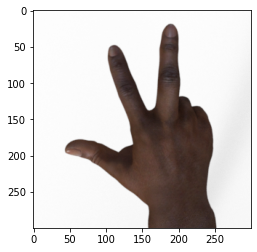

In [ ]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0] 
image = train_images[0].reshape(300,300)

plt.imshow(rgb_image)
rgb_image.shape

## Convert PNG/JPG images to Numpy Format

(372, 560, 3)


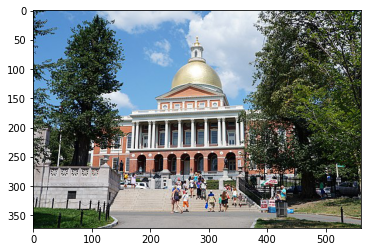

In [ ]:
import imageio

im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Massachusetts_State_House_-_panoramio_%281%29.jpg/560px-Massachusetts_State_House_-_panoramio_%281%29.jpg')

plt.imshow(im)

im_np = np.asarray(im)

print(im_np.shape)
